  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

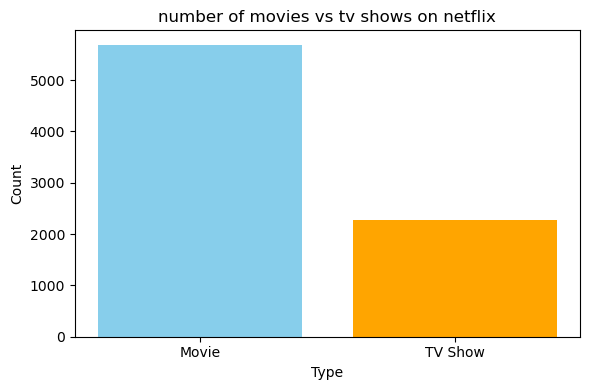

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

my_csv = pd.read_csv('netflix_titles.csv')

print(my_csv.head())



# clean data
my_csv = my_csv.dropna(subset=['type','release_year','rating','country','duration'])
type_counts = my_csv['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
plt.title('number of movies vs tv shows on netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()




In [7]:
print(my_csv.isnull().sum())

show_id            0
type               0
title              0
director        2223
cast             671
country            0
date_added         9
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


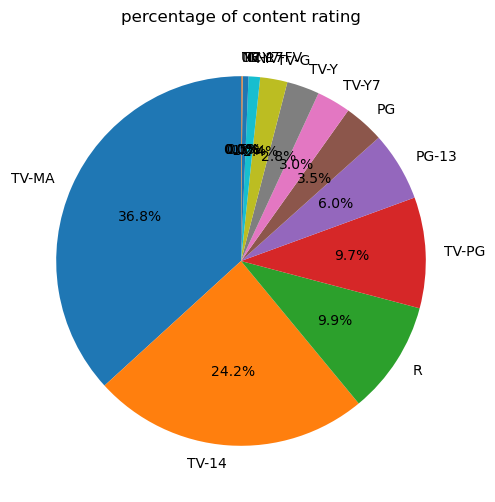

In [15]:
rating_counts = my_csv['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('percentage of content rating')

plt.show()

/tmp/ipykernel_7867/3387662524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)


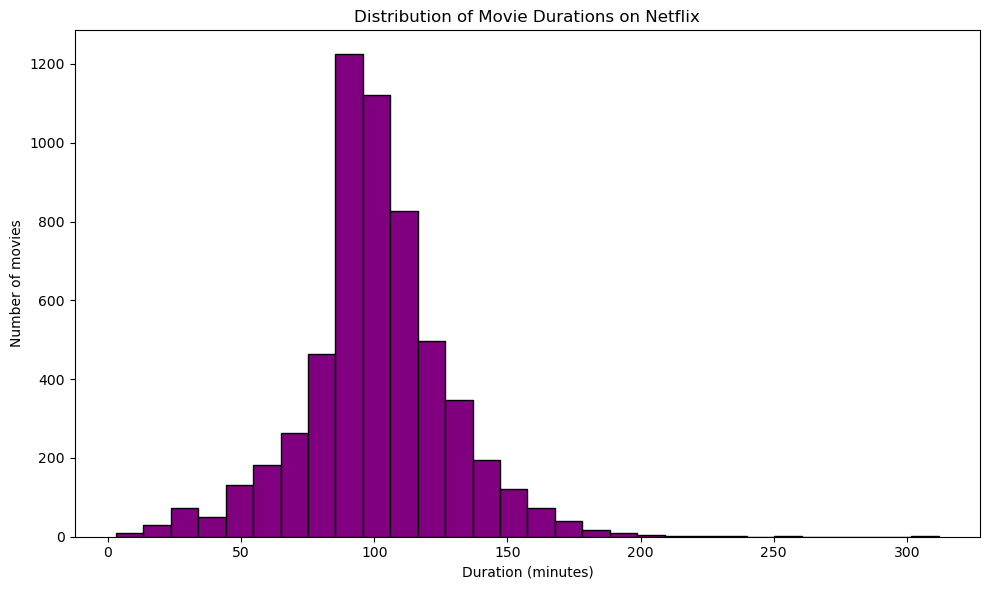

In [17]:
movie_df = my_csv[my_csv['type']=='Movie']
movie_df['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)

plt.figure(figsize=(10,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of movies')
plt.tight_layout()
plt.show()

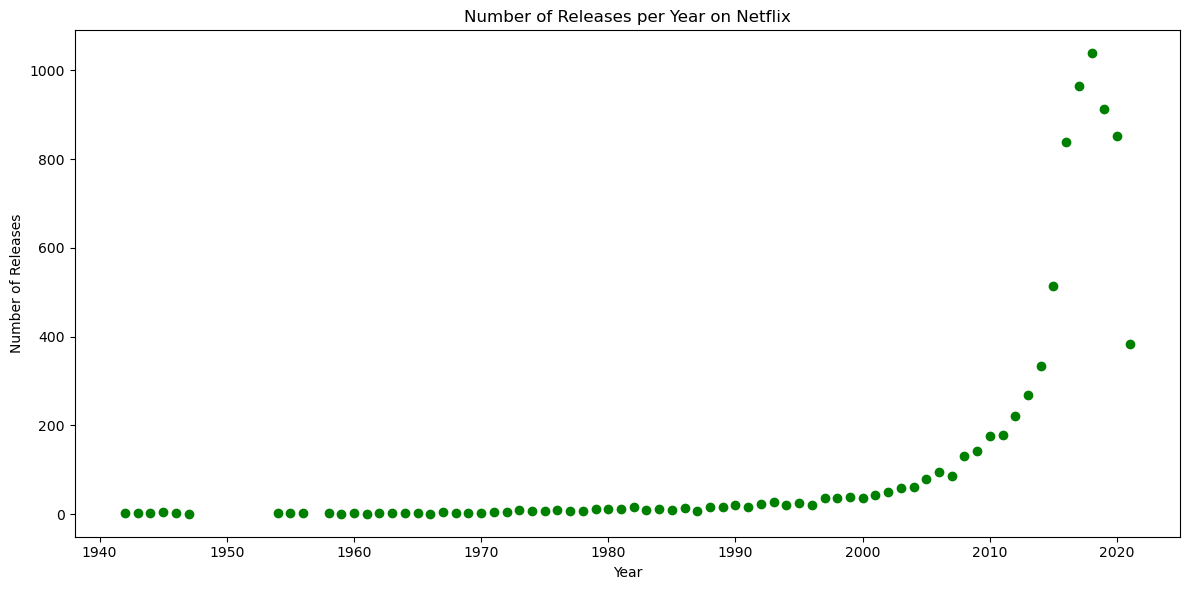

In [20]:
release_counts = my_csv['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.scatter(release_counts.index,release_counts.values,color='green')
# plt.plot(release_counts.index,release_counts.values,color='lightgreen',alpha=0.5)
plt.title('Number of Releases per Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.tight_layout()
plt.show()

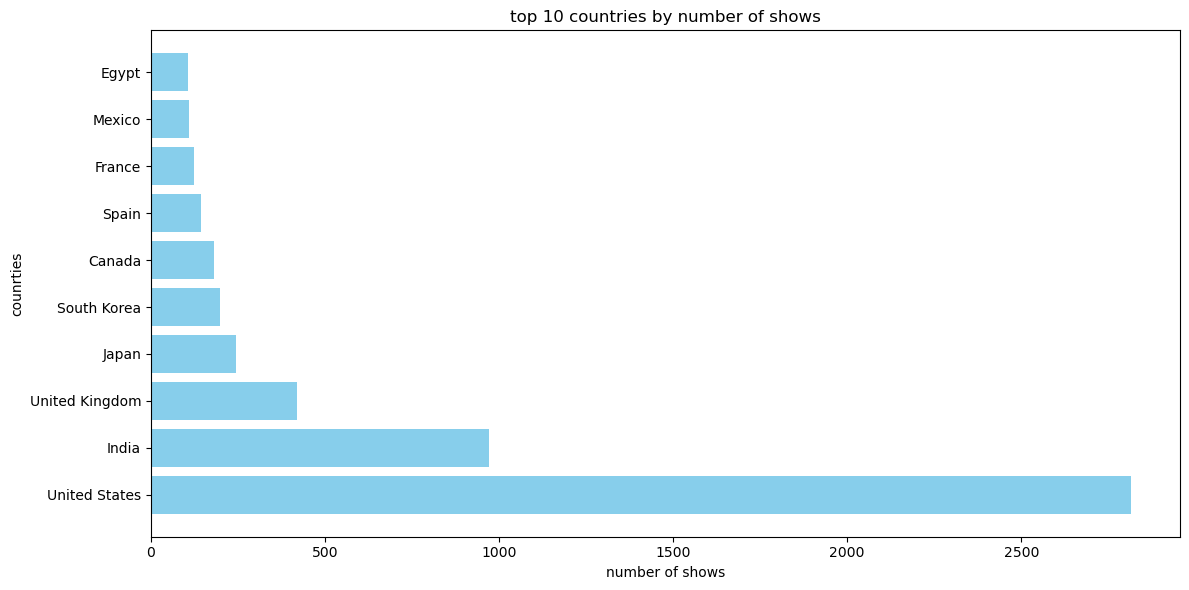

In [24]:
country_counts= my_csv['country'].value_counts().head(10)

plt.figure(figsize=(12,6))
plt.barh(country_counts.index,country_counts.values,color='skyblue')
plt.title('top 10 countries by number of shows')
plt.xlabel('number of shows')
plt.ylabel('counrties')
plt.tight_layout()
plt.show()

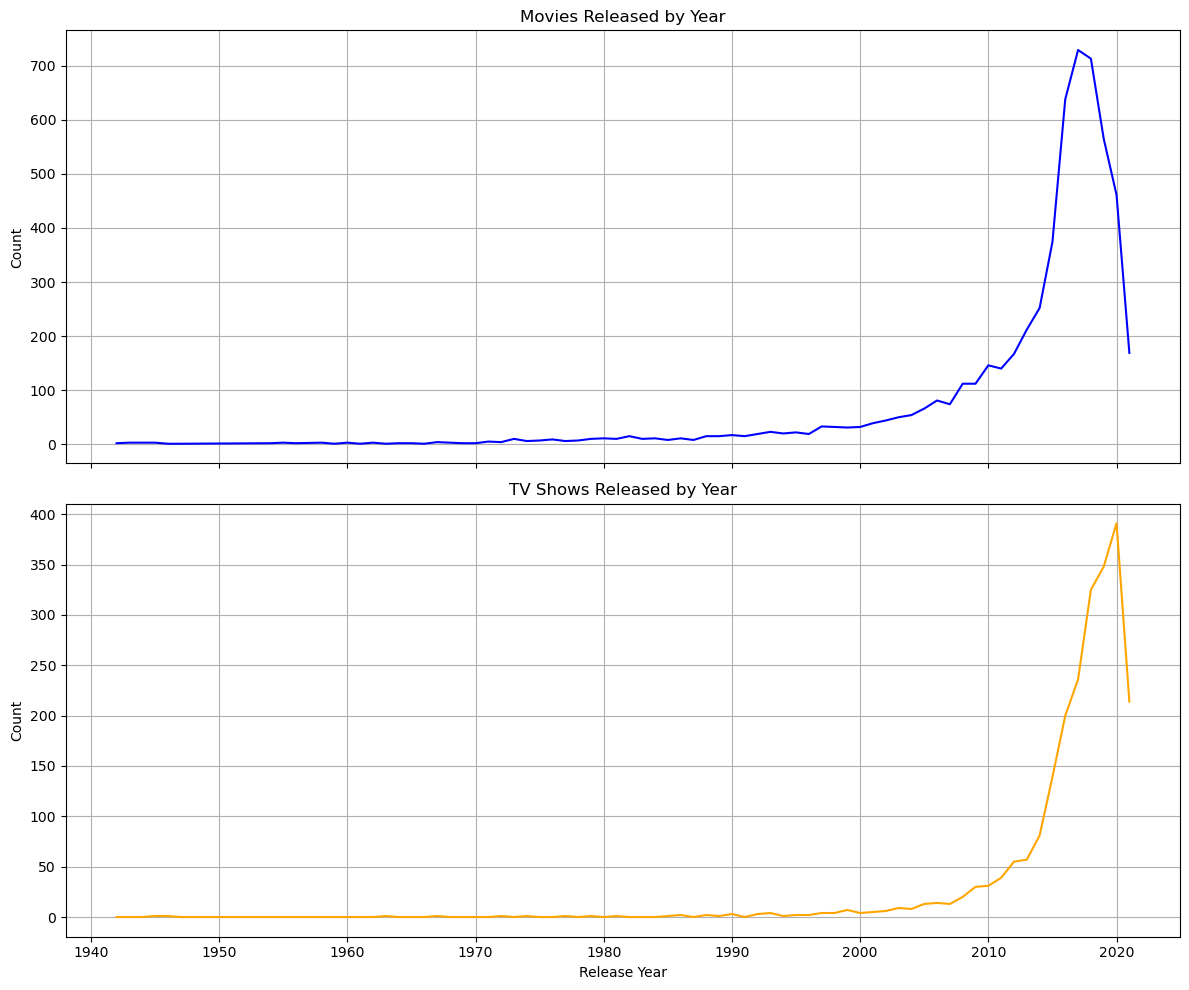

In [27]:
content_by_year = my_csv.groupby(['release_year','type']).size().unstack().fillna(0)

fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Movies subplot
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released by Year')
ax[0].set_ylabel('Count')
ax[0].grid(True)

# TV Shows subplot
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released by Year')
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Count')
ax[1].grid(True)

plt.tight_layout()
plt.show()
